In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
RANDOM_STATE = 101

### Load Data

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

#### Balancing dataset

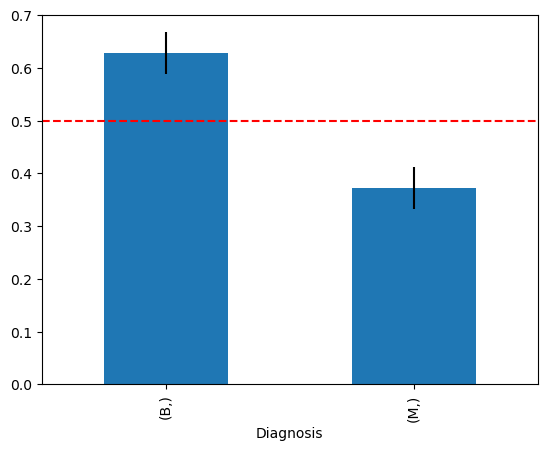

In [4]:
freqs =y.value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

freqs.plot(kind='bar',yerr=std_errors*1.96)

plt.axhline(expected_frequency,color='red',linestyle='--')

### Model

#### Default

In [5]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify = y)

In [6]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [7]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.93      0.94        72
           M       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [8]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

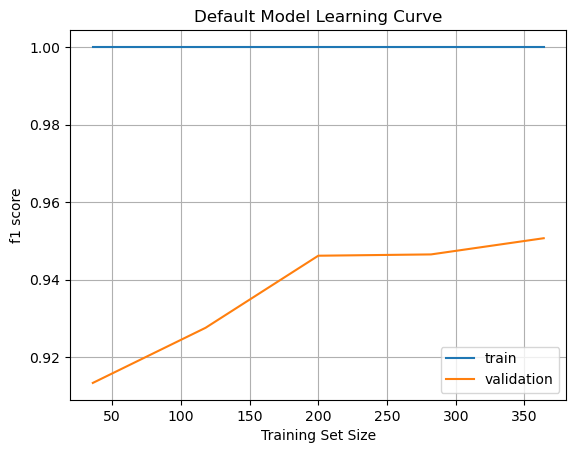

In [9]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Default Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/boost_bc_default_learning_curve.png')
plt.show()

#### Final Model

In [10]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE, learning_rate=1, n_estimators=50)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
t0 = time.time()
pipeline.fit(X_train, y_train.values.ravel())
print("Training time:", time.time()-t0)
y_pred = pipeline.predict(X_test)

Training time: 0.12310409545898438


In [11]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.93      0.94        72
           M       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [12]:
# train_sizes = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

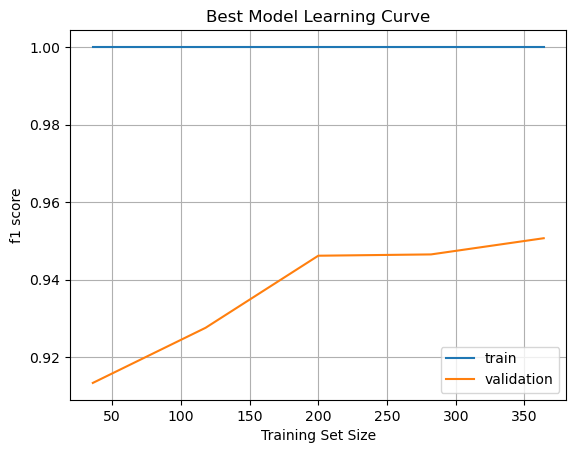

In [13]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Best Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/boost_bc_best_learning_curve.png')
plt.show()

#### Sub/Optimal Learning Curve

In [14]:
# Suboptimal Model
clf = AdaBoostClassifier(random_state=RANDOM_STATE, learning_rate=.05, n_estimators=100)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [15]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        72
           M       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [16]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE, learning_rate=.05, n_estimators=100)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])

train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

clf = AdaBoostClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])

train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

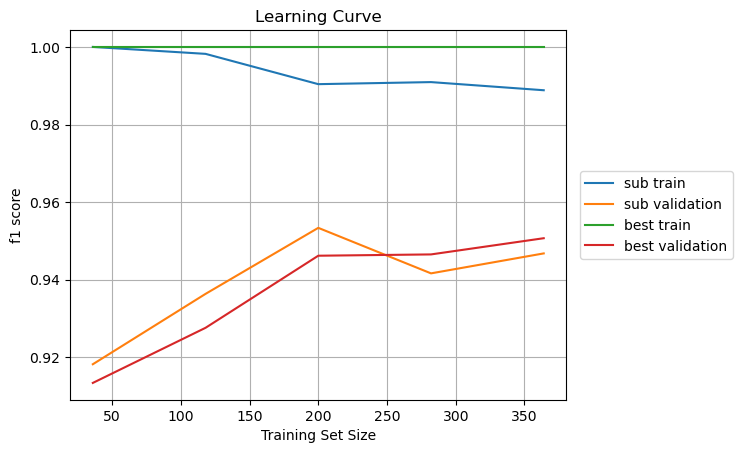

In [17]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)

plt.plot(train_sizes, train_mean, label="sub train")
plt.plot(train_sizes, validation_mean, label="sub validation")
plt.plot(train_sizes1, train_mean1, label="best train")
plt.plot(train_sizes1, validation_mean1, label="best validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
# plt.tight_layout()
plt.grid()
plt.savefig('breast_cancer_plots/boost_bc_combo_learning_curve.png', bbox_inches='tight')
plt.show()

### Validation Plot

In [18]:
from sklearn.model_selection import validation_curve
import numpy as np

In [19]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])

#### N Estimators

In [20]:
parameter_range = [1, 5, 10, 50]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                           param_name="model__n_estimators",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

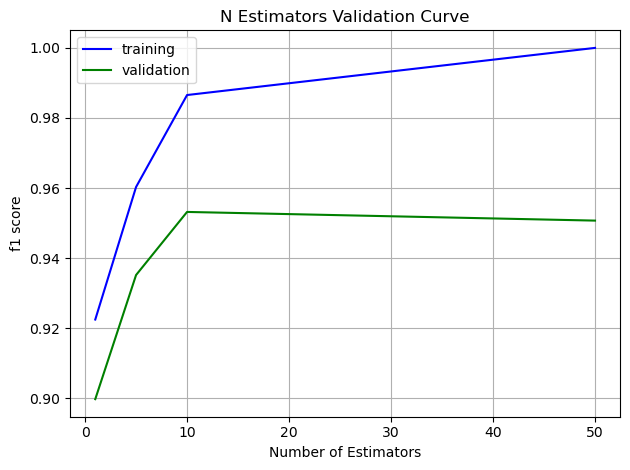

In [21]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)


# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("N Estimators Validation Curve")
plt.xlabel("Number of Estimators")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('breast_cancer_plots/boost_bc_n_estimator_validation_curve.png')
plt.show()

#### Learning Rate

In [22]:
parameter_range = [0, .01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.5]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                           param_name="model__learning_rate",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

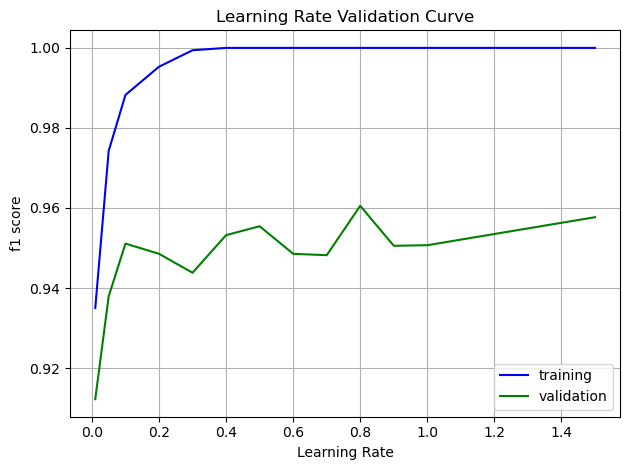

In [23]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)


# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("Learning Rate Validation Curve")
plt.xlabel("Learning Rate")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('breast_cancer_plots/boost_bc_learning_rate_validation_curve.png')
plt.show()

### Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
params = [{'model__n_estimators':[1, 5, 10, 50, 100, 150, 200, 250],
          'model__learning_rate': [0, .01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],}]
grid = GridSearchCV(pipeline,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=5)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'model__learning_rate': 1, 'model__n_estimators': 50}
              precision    recall  f1-score   support

           B       0.94      0.93      0.94        72
           M       0.88      0.90      0.89        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11